In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
df = pd.read_csv('coviddatanew.csv')
df.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,symptoms,travel_history_location,additional_information,chronic_disease_binary,source,country_new
0,000-1-1,52,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,14.02.2020,fever,China,Case 55; mainland China travel via the Lok Ma ...,False,https://www.scmp.com/news/hong-kong/health-env...,China
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,21.02.2020,cough,China,Hospitalized on 12.02.2020 for other reasons,False,https://www.corriere.it/cronache/20_febbraio_2...,Italy
2,000-1-100,61,female,Vo Euganeo,Veneto,Singapore,1.353460,103.815100,admin0,14.02.2020,headache,China,"Case 65; family member of Case 50, a DBS emplo...",False,https://www.corriere.it/cronache/20_febbraio_2...,Singapore
3,000-1-1000,61,female,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,26.01.2020,"fever,cough",China,"Case 65; family member of Case 50, a DBS emplo...",False,https://news.163.com/special/epidemic/?spssid=...,China
4,000-1-10000,61,female,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,14.02.2020,"fever,cough",China,"Case 65; family member of Case 50, a DBS emplo...",False,http://hc.jiangxi.gov.cn/doc/2020/02/15/138898...,China


In [85]:
df.tail()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,symptoms,travel_history_location,additional_information,chronic_disease_binary,source,country_new
7570,007-170856,62,female,Dvorce,Vysocina Region,Czech Republic,49.373590,15.489300,point,21.05.2020,respiratory difficult breathing died same day,Belgium,France swapped to only giving hospitalisation ...,False,https://onemocneni-aktualne.mzcr.cz/api/v2/cov...,Czech Republic
7571,007-170857,29,male,Rakovnik,Central Bohemian Region,Czech Republic,50.096618,13.720700,point,23.05.2020,respiratory difficult breathing died same day,Qatar,France swapped to only giving hospitalisation ...,False,https://onemocneni-aktualne.mzcr.cz/api/v2/cov...,Czech Republic
7572,007-172605,15-34,female,Rendsburg-Eckernförde,Schleswig-Holstein,Germany,54.289713,9.781941,point,28.05.2020,respiratory difficult breathing died same day,Qatar,France swapped to only giving hospitalisation ...,False,https://npgeo-corona-npgeo-de.hub.arcgis.com/d...,Germany
7573,007-174571,15-34,male,Börde,Sachsen-Anhalt,Germany,52.220718,11.347230,point,27.05.2020,respiratory difficult breathing died same day,Qatar,France swapped to only giving hospitalisation ...,False,https://npgeo-corona-npgeo-de.hub.arcgis.com/d...,Germany
7574,007-21992,0-4,male,Mulheim,Nordrhein-Westfalen,Germany,50.961580,7.005560,point,22.04.2020,respiratory difficult breathing died same day,Qatar,France swapped to only giving hospitalisation ...,False,https://npgeo-corona-npgeo-de.hub.arcgis.com/d...,Germany


In [86]:
df.describe()

,latitude,longitude
count,7575.000000,7575.000000
mean,29.991079,19.842965
std,19.705375,76.791685
min,-54.000000,-159.727597
25%,19.187825,-62.086893
50%,32.473749,11.776639
75%,45.745150,85.279570
max,70.071800,174.740000


## df.isnull().sum()

In [87]:
df = df.iloc[:, [7,6]].values

In [88]:
df

array([[114.133808  ,  22.3650193 ],
       [ 11.6583815 ,  45.2977477 ],
       [103.8151    ,   1.35346   ],
       ...,
       [  9.78194123,  54.28971291],
       [ 11.34723024,  52.2207185 ],
       [  7.00556   ,  50.96158   ]])

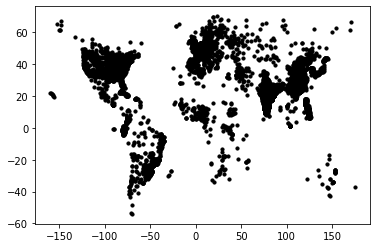

In [89]:
plt.scatter(df[:,0], df[:,1], s=10, c="black")

In [90]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [91]:
labels = dbscan.fit_predict(df)

In [92]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

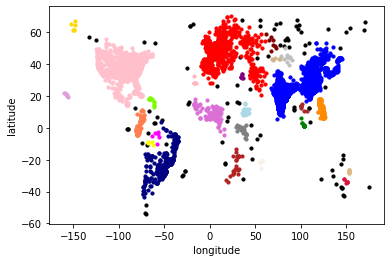

In [93]:
plt.scatter(df[labels== -1,0], df[labels== -1,1], s=10, c= 'black')
plt.scatter(df[labels== 0,0], df[labels== 0,1], s=10, c= 'blue')
plt.scatter(df[labels== 1,0], df[labels== 1,1], s=10, c= 'red')
plt.scatter(df[labels== 2,0], df[labels== 2,1], s=10, c= 'green')
plt.scatter(df[labels== 3,0], df[labels== 3,1], s=10, c= 'brown')
plt.scatter(df[labels== 4,0], df[labels== 4,1], s=10, c= 'pink')
plt.scatter(df[labels== 5,0], df[labels== 5,1], s=10, c= 'silver')
plt.scatter(df[labels== 6,0], df[labels== 6,1], s=10, c= 'purple')
plt.scatter(df[labels== 7,0], df[labels== 7,1], s=10, c= 'lightpink')
plt.scatter(df[labels== 8,0], df[labels== 8,1], s=10, c= 'navy')
plt.scatter(df[labels== 9,0], df[labels== 9,1], s=10, c= 'burlywood')
plt.scatter(df[labels== 10,0], df[labels== 10,1], s=10, c= 'orchid')
plt.scatter(df[labels== 11,0], df[labels== 11,1], s=10, c= 'crimson')
plt.scatter(df[labels== 12,0], df[labels== 12,1], s=10, c= 'coral')
plt.scatter(df[labels== 13,0], df[labels== 13,1], s=10, c= 'darkorange')
plt.scatter(df[labels== 14,0], df[labels== 14,1], s=10, c= 'firebrick')
plt.scatter(df[labels== 15,0], df[labels== 15,1], s=10, c= 'plum')
plt.scatter(df[labels== 16,0], df[labels== 16,1], s=10, c= 'gold')
plt.scatter(df[labels== 17,0], df[labels== 17,1], s=10, c= 'gray')
plt.scatter(df[labels== 18,0], df[labels== 18,1], s=10, c= 'lightblue')
plt.scatter(df[labels== 19,0], df[labels== 19,1], s=10, c= 'lawngreen')
plt.scatter(df[labels== 20,0], df[labels== 20,1], s=10, c= 'linen')
plt.scatter(df[labels== 21,0], df[labels== 21,1], s=10, c= 'magenta')
plt.scatter(df[labels== 22,0], df[labels== 22,1], s=10, c= 'maroon')
plt.scatter(df[labels== 23,0], df[labels== 23,1], s=10, c= 'tan')
plt.scatter(df[labels== 24,0], df[labels== 24,1], s=10, c= 'yellow')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()